#### IN this project we use CNN(convolutional neural network:- CNNs are a type of deep neural network that are commonly used in CV tasks for their ability to extract local features from images  and handle variations in object appearance and orientation. They are composed of convolutional layers, pooling layers, and fully connected layers. 


### Import important library for build the train and load the image

In [192]:
import numpy as np 
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from sklearn.metrics import classification_report,confusion_matrix

### Convert RGB image into digit(0-255) by using keras Train and valid dataset

In [181]:
train_dataSet = tf.data.Dataset.list_files('train/*/*', shuffle=True)
image_count = len(train_dataSet)
print(f"Total train data set {image_count}")

Total train data set 70295


In [182]:
valid_dataSet = tf.data.Dataset.list_files('valid/*/*', shuffle=True)
image_count = len(valid_dataSet)
print(f"Total valid data set {image_count}")

Total valid data set 17572


In [14]:
 train_image = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels= "inferred",         #this inferred label detected form train data set automatice
    label_mode="categorical",   #means that the labels are encoded as a categorical vector,
    class_names=None,
    color_mode="rgb",
    batch_size=32,              # for fast processing use 64 at a time in pipe line of tensorflow
    image_size=(128, 128),      # reduce image size of 128 by 128
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


##### visulaization data how data look like

In [106]:
for train_dataset in train_image:
    print(len(train_dataset[0][0][0]))
    print(len(train_dataset[0][0]))
    print(len(train_dataset[0]))
    print(train_dataset[0][0][0])
    print(len(train_dataset))
    break

128
128
64
tf.Tensor(
[[203.25 192.25 198.25]
 [208.5  197.5  203.5 ]
 [213.5  202.5  208.5 ]
 [212.25 201.25 207.25]
 [209.   198.   204.  ]
 [207.25 196.25 202.25]
 [211.75 200.75 206.75]
 [214.   203.   209.  ]
 [210.5  199.5  205.5 ]
 [207.5  196.5  202.5 ]
 [207.5  196.5  202.5 ]
 [210.25 199.25 205.25]
 [209.25 198.25 204.25]
 [204.75 193.75 199.75]
 [211.   200.   206.  ]
 [209.5  198.5  204.5 ]
 [208.   197.   203.  ]
 [210.25 199.25 205.25]
 [207.5  196.5  202.5 ]
 [204.5  193.5  199.5 ]
 [209.   198.   204.  ]
 [207.   196.   202.  ]
 [208.25 197.25 203.25]
 [207.25 196.25 202.25]
 [208.5  197.5  203.5 ]
 [205.25 194.25 200.25]
 [206.   195.   201.  ]
 [205.75 194.75 200.75]
 [209.   198.   204.  ]
 [210.25 199.25 205.25]
 [209.5  198.5  204.5 ]
 [211.   200.   206.  ]
 [200.   189.   197.  ]
 [204.75 193.75 201.75]
 [203.5  192.5  200.5 ]
 [211.75 200.75 208.75]
 [203.75 192.75 200.75]
 [198.75 187.75 195.75]
 [203.25 192.25 200.25]
 [212.25 201.25 209.25]
 [201.25 190.25 19

In [15]:
validation_image = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels= "inferred",         #this inferred label detected form train data set automatice
    label_mode="categorical",   #means that the labels are encoded as a categorical vector,
    class_names=None,
    color_mode="rgb",
    batch_size=32,              # for fast processing use 64 at a time in pipe line of tensorflow
    image_size=(128, 128),      # reduce image size of 128 by 128
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,               #if we have both train and validation data set then this is use validation set 
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [109]:
for i in validation_image:
    # break
    print(len(i))
    print(i)
    break

2
(<tf.Tensor: shape=(64, 128, 128, 3), dtype=float32, numpy=
array([[[[180.25, 170.25, 161.25],
         [179.75, 169.75, 160.75],
         [181.  , 171.  , 162.  ],
         ...,
         [154.75, 145.75, 138.75],
         [150.75, 141.75, 134.75],
         [149.5 , 140.5 , 133.5 ]],

        [[179.  , 169.  , 160.  ],
         [187.25, 177.25, 168.25],
         [182.25, 172.25, 163.25],
         ...,
         [151.75, 142.75, 135.75],
         [149.25, 140.25, 133.25],
         [156.25, 147.25, 140.25]],

        [[181.  , 171.  , 162.  ],
         [175.75, 165.75, 156.75],
         [184.5 , 174.5 , 165.5 ],
         ...,
         [137.75, 128.75, 121.75],
         [147.75, 138.75, 131.75],
         [149.  , 140.  , 133.  ]],

        ...,

        [[147.75, 135.75, 123.75],
         [156.5 , 144.5 , 132.5 ],
         [165.75, 153.75, 141.75],
         ...,
         [145.  , 132.  , 123.  ],
         [160.25, 147.25, 138.25],
         [156.5 , 143.5 , 134.5 ]],

        [[157.25, 14

### train the model we use CNN and in this case we have input image and goes in convolution and select important feature and after that comes polling process then this also take reduce dimension and take important feature and after that fully connected convolutional neural network

## Train the model

In [18]:
CNN_model = Sequential()

#### add first layer

In [25]:
# Add the first convolutional layer
CNN_model.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=3,
                                     padding='same',
                                     activation='relu',
                                     input_shape=[128,128,3]))
#Add second convolutional layer
CNN_model.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=3,
                                     activation='relu'))
#Add maxPolling players
CNN_model.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                        strides=2))

#### add second layer

In [27]:
# Add the first convolutional layer
CNN_model.add(tf.keras.layers.Conv2D(filters=64,
                                     kernel_size=3,
                                     padding='same',
                                     activation='relu'))
#Add second convolutional layer
CNN_model.add(tf.keras.layers.Conv2D(filters=64,
                                     kernel_size=3,
                                     activation='relu'))
#Add maxPolling players
CNN_model.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                        strides=2))

#### add third layer

In [29]:
# Add the first convolutional layer
CNN_model.add(tf.keras.layers.Conv2D(filters=128,                                     kernel_size=3,
                                     padding='same',
                                     activation='relu'))
#Add second convolutional layer
CNN_model.add(tf.keras.layers.Conv2D(filters=128,
                                     kernel_size=3,
                                     activation='relu'))
#Add maxPolling players
CNN_model.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                        strides=2))

#### add fourth layer 

In [31]:
# Add the first convolutional layer
CNN_model.add(tf.keras.layers.Conv2D(filters=256,
                                     kernel_size=3,
                                     padding='same',
                                     activation='relu'))
#Add second convolutional layer
CNN_model.add(tf.keras.layers.Conv2D(filters=256,
                                     kernel_size=3,
                                     activation='relu'))
#Add maxPolling players
CNN_model.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                        strides=2))

#### add fifth layer

In [33]:
# Add the first convolutional layer
CNN_model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=3,
                                     padding='same',
                                     activation='relu'))
#Add second convolutional layer
CNN_model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=3,
                                     activation='relu'))
#Add maxPolling players
CNN_model.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                        strides=2))

#### flat the data after the convolutional and polling 

In [35]:
CNN_model.add(Flatten())

#### add dropout for avoid overfiiting 

In [37]:
CNN_model.add(tf.keras.layers.Dropout(0.20))

#### add initial neural is 1600 

In [39]:
CNN_model.add(Dense(units=1400,activation = 'relu'))

In [41]:
CNN_model.add(tf.keras.layers.Dropout(0.40))

#### output layer and use softmax

In [43]:
CNN_model.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [45]:
CNN_model.compile(optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
CNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1400)           │     2,868,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        53,238 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,634,062 (29.12 MB)

 Trainable params: 7,634,062 (29.12 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
training_history = CNN_model.fit(x= train_image,validation_data=validation_image,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2676s 1s/step - accuracy: 0.3828 - loss: 2.1958 - val_accuracy: 0.7880 - val_loss: 0.6793
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2930s 1s/step - accuracy: 0.8231 - loss: 0.5544 - val_accuracy: 0.8888 - val_loss: 0.3431
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1970s 897ms/step - accuracy: 0.8989 - loss: 0.3134 - val_accuracy: 0.9367 - val_loss: 0.1980
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1935s 881ms/step - accuracy: 0.9338 - loss: 0.2079 - val_accuracy: 0.9497 - val_loss: 0.1587
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1910s 869ms/step - accuracy: 0.9490 - loss: 0.1559 - val_accuracy: 0.9490 - val_loss: 0.1606
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2236s 1s/step - accuracy: 0.9625 - loss: 0.1149 - val_accuracy: 0.9523 - val_loss: 0.1590
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2181s 993ms/step - accuracy: 0.9692 - loss: 0.0934 - val_accuracy: 0.9247 - val_loss: 0.2356
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2090s 951ms/step - acc

### Evaluation model on train and validation data set

In [60]:
loss_on_train,accuracy_train = CNN_model.evaluate(train_image)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 774s 352ms/step - accuracy: 0.9853 - loss: 0.0471


In [63]:
print(f" this is loss of in train data set {loss_on_train},accuracy {accuracy_train}")

 this is loss of in train data set 0.041769303381443024,accuracy 0.9866277575492859


In [65]:
loss_on_val,accuracy_val = CNN_model.evaluate(validation_image)

550/550 ━━━━━━━━━━━━━━━━━━━━ 192s 350ms/step - accuracy: 0.9588 - loss: 0.1327


In [67]:
print(f" this is loss of in validation data set {loss_on_val},accuracy {accuracy_val}")

 this is loss of in validation data set 0.14376617968082428,accuracy 0.9566924571990967


### SAVING MODEL 

In [79]:
pip install --upgrade keras tensorflow

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/8d/44/c604ecc5c9993b6574a681f2f505e980725871a89cfd9e48597b12ccb506/keras-3.3.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.1/1.1 MB 2.1 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.1 MB 2.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.1 MB 2.1 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.1 MB 1.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.4/1.1 MB 1.7 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.1 MB 1.6 MB/s eta 0:00:01
   ------------------- -------------------- 0.5/1.1 MB 1.6 MB/s eta 0:00:01
   ---------------------- ----------------- 0.6/1.1 MB 1.5 MB/s eta 0:00:01
   ----------------------- ---------------- 0.7/1.1 MB 1.5 

In [83]:
CNN_model.save('trainedFuture.keras')

ImportError: h5py must be installed in order to save a model.

In [87]:
training_history.history

{'accuracy': [0.582473874092102,
  0.8489081859588623,
  0.9092111587524414,
  0.9384166598320007,
  0.9529696106910706,
  0.9641226530075073,
  0.9713919758796692,
  0.9748203754425049,
  0.9790170192718506,
  0.9812077879905701],
 'loss': [1.419961929321289,
  0.4754207730293274,
  0.28182145953178406,
  0.19151027500629425,
  0.14369970560073853,
  0.11043277382850647,
  0.08767455816268921,
  0.0765935555100441,
  0.06434833258390427,
  0.057189423590898514],
 'val_accuracy': [0.7880150079727173,
  0.8888003826141357,
  0.9366605877876282,
  0.9497495889663696,
  0.948952853679657,
  0.9523105025291443,
  0.9246528744697571,
  0.9594240784645081,
  0.9609606266021729,
  0.9566924571990967],
 'val_loss': [0.6793303489685059,
  0.34311431646347046,
  0.19798247516155243,
  0.15867364406585693,
  0.16060954332351685,
  0.15900211036205292,
  0.2356491982936859,
  0.14049050211906433,
  0.12820354104042053,
  0.14376616477966309]}

In [89]:
import json

In [95]:
with open("trainDataAndValidation.json","w") as f:
    json.dump(training_history.history,f)
    

In [104]:
listOfEpochs = []
j = 1
for i in range(0,10):
    listOfEpochs.insert(i,j)
    j = j+1

In [112]:
# for i in range(0,10):
    # print(listOfEpochs[i])    

<function matplotlib.pyplot.show(close=None, block=None)>

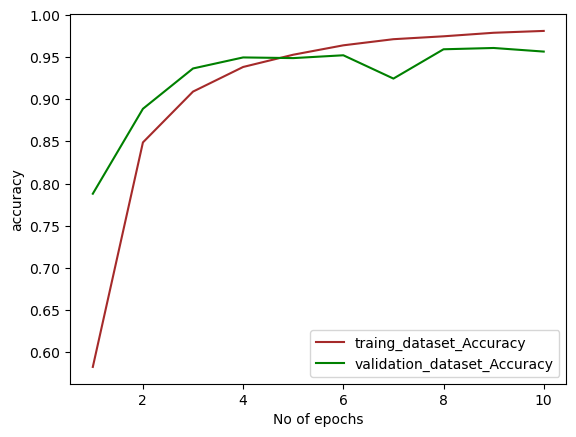

In [120]:
plt.plot(listOfEpochs,training_history.history['accuracy'],color = 'brown',label = 'traing_dataset_Accuracy')
plt.plot(listOfEpochs,training_history.history['val_accuracy'],color = 'green',label = 'validation_dataset_Accuracy')
plt.xlabel("No of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show         

In [130]:
AllClassName = validation_image.class_names
AllClassName

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [128]:
print(AllClassName)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

###  test the model on test data set

In [133]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels= "inferred",         #this inferred label detected form train data set automatice
    label_mode="categorical",   #means that the labels are encoded as a categorical vector,
    class_names=None,
    color_mode="rgb",
    batch_size=32,              # for fast processing use 64 at a time in pipe line of tensorflow
    image_size=(128, 128),      # reduce image size of 128 by 128
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,               #if we have both train and validation data set then this is use validation set 
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [135]:
PredictionOntestDataset = CNN_model.predict(test_dataset)

550/550 ━━━━━━━━━━━━━━━━━━━━ 171s 311ms/step


In [137]:
print(PredictionOntestDataset,PredictionOntestDataset.shape)

[[9.9507183e-01 2.4583464e-06 6.2711742e-08 ... 3.8329603e-11
  2.6068413e-11 6.1223698e-10]
 [9.8231053e-01 1.9231383e-04 6.8758374e-07 ... 2.6151031e-10
  5.3906890e-10 1.3211624e-08]
 [9.9998283e-01 7.3689840e-08 1.7369904e-07 ... 5.3589902e-12
  8.0658380e-10 1.3588554e-07]
 ...
 [1.8323768e-11 8.3571876e-14 2.8010802e-10 ... 2.4646930e-11
  1.9211889e-12 1.0000000e+00]
 [4.4484839e-11 8.9732217e-14 1.3369912e-09 ... 1.0853351e-10
  1.9282078e-12 9.9999988e-01]
 [4.4658330e-16 6.7124502e-17 1.1828236e-14 ... 1.2249954e-17
  1.1076770e-14 1.0000000e+00]] (17572, 38)


In [163]:
MaxProbability_predicion = tf.argmax(PredictionOntestDataset,axis = 1)

In [143]:
print(MaxProbability)

tf.Tensor([ 0  0  0 ... 37 37 37], shape=(17572,), dtype=int64)


In [147]:
TrueLevelIndataset = tf.concat([y for x,y in test_dataset],axis = 0)

In [149]:
print(TrueLevelIndataset)

tf.Tensor(
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]], shape=(17572, 38), dtype=float32)


In [159]:
TruelevelIndataset = tf.argmax(TrueLevelIndataset,axis = 1)
print(MaxProbability)

tf.Tensor([ 0  0  0 ... 37 37 37], shape=(17572,), dtype=int64)


In [173]:
classification = classification_report(TruelevelIndataset,MaxProbability_predicion,target_names = AllClassName)

In [175]:
print(classification)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.90      0.94       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.98       440
                                   Apple___healthy       0.88      0.98      0.93       502
                               Blueberry___healthy       0.94      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.91      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

In [181]:
confusion_matrixs = confusion_matrix(TruelevelIndataset,MaxProbability_predicion)

In [188]:
print(confusion_matrixs)
print(confusion_matrixs.shape)

[[455   0   0 ...   0   0   0]
 [  0 490   0 ...   0   0   0]
 [  0   0 435 ...   0   0   1]
 ...
 [  0   0   0 ... 472   0   0]
 [  0   0   0 ...   0 444   0]
 [  0   0   0 ...   0   0 479]]
(38, 38)


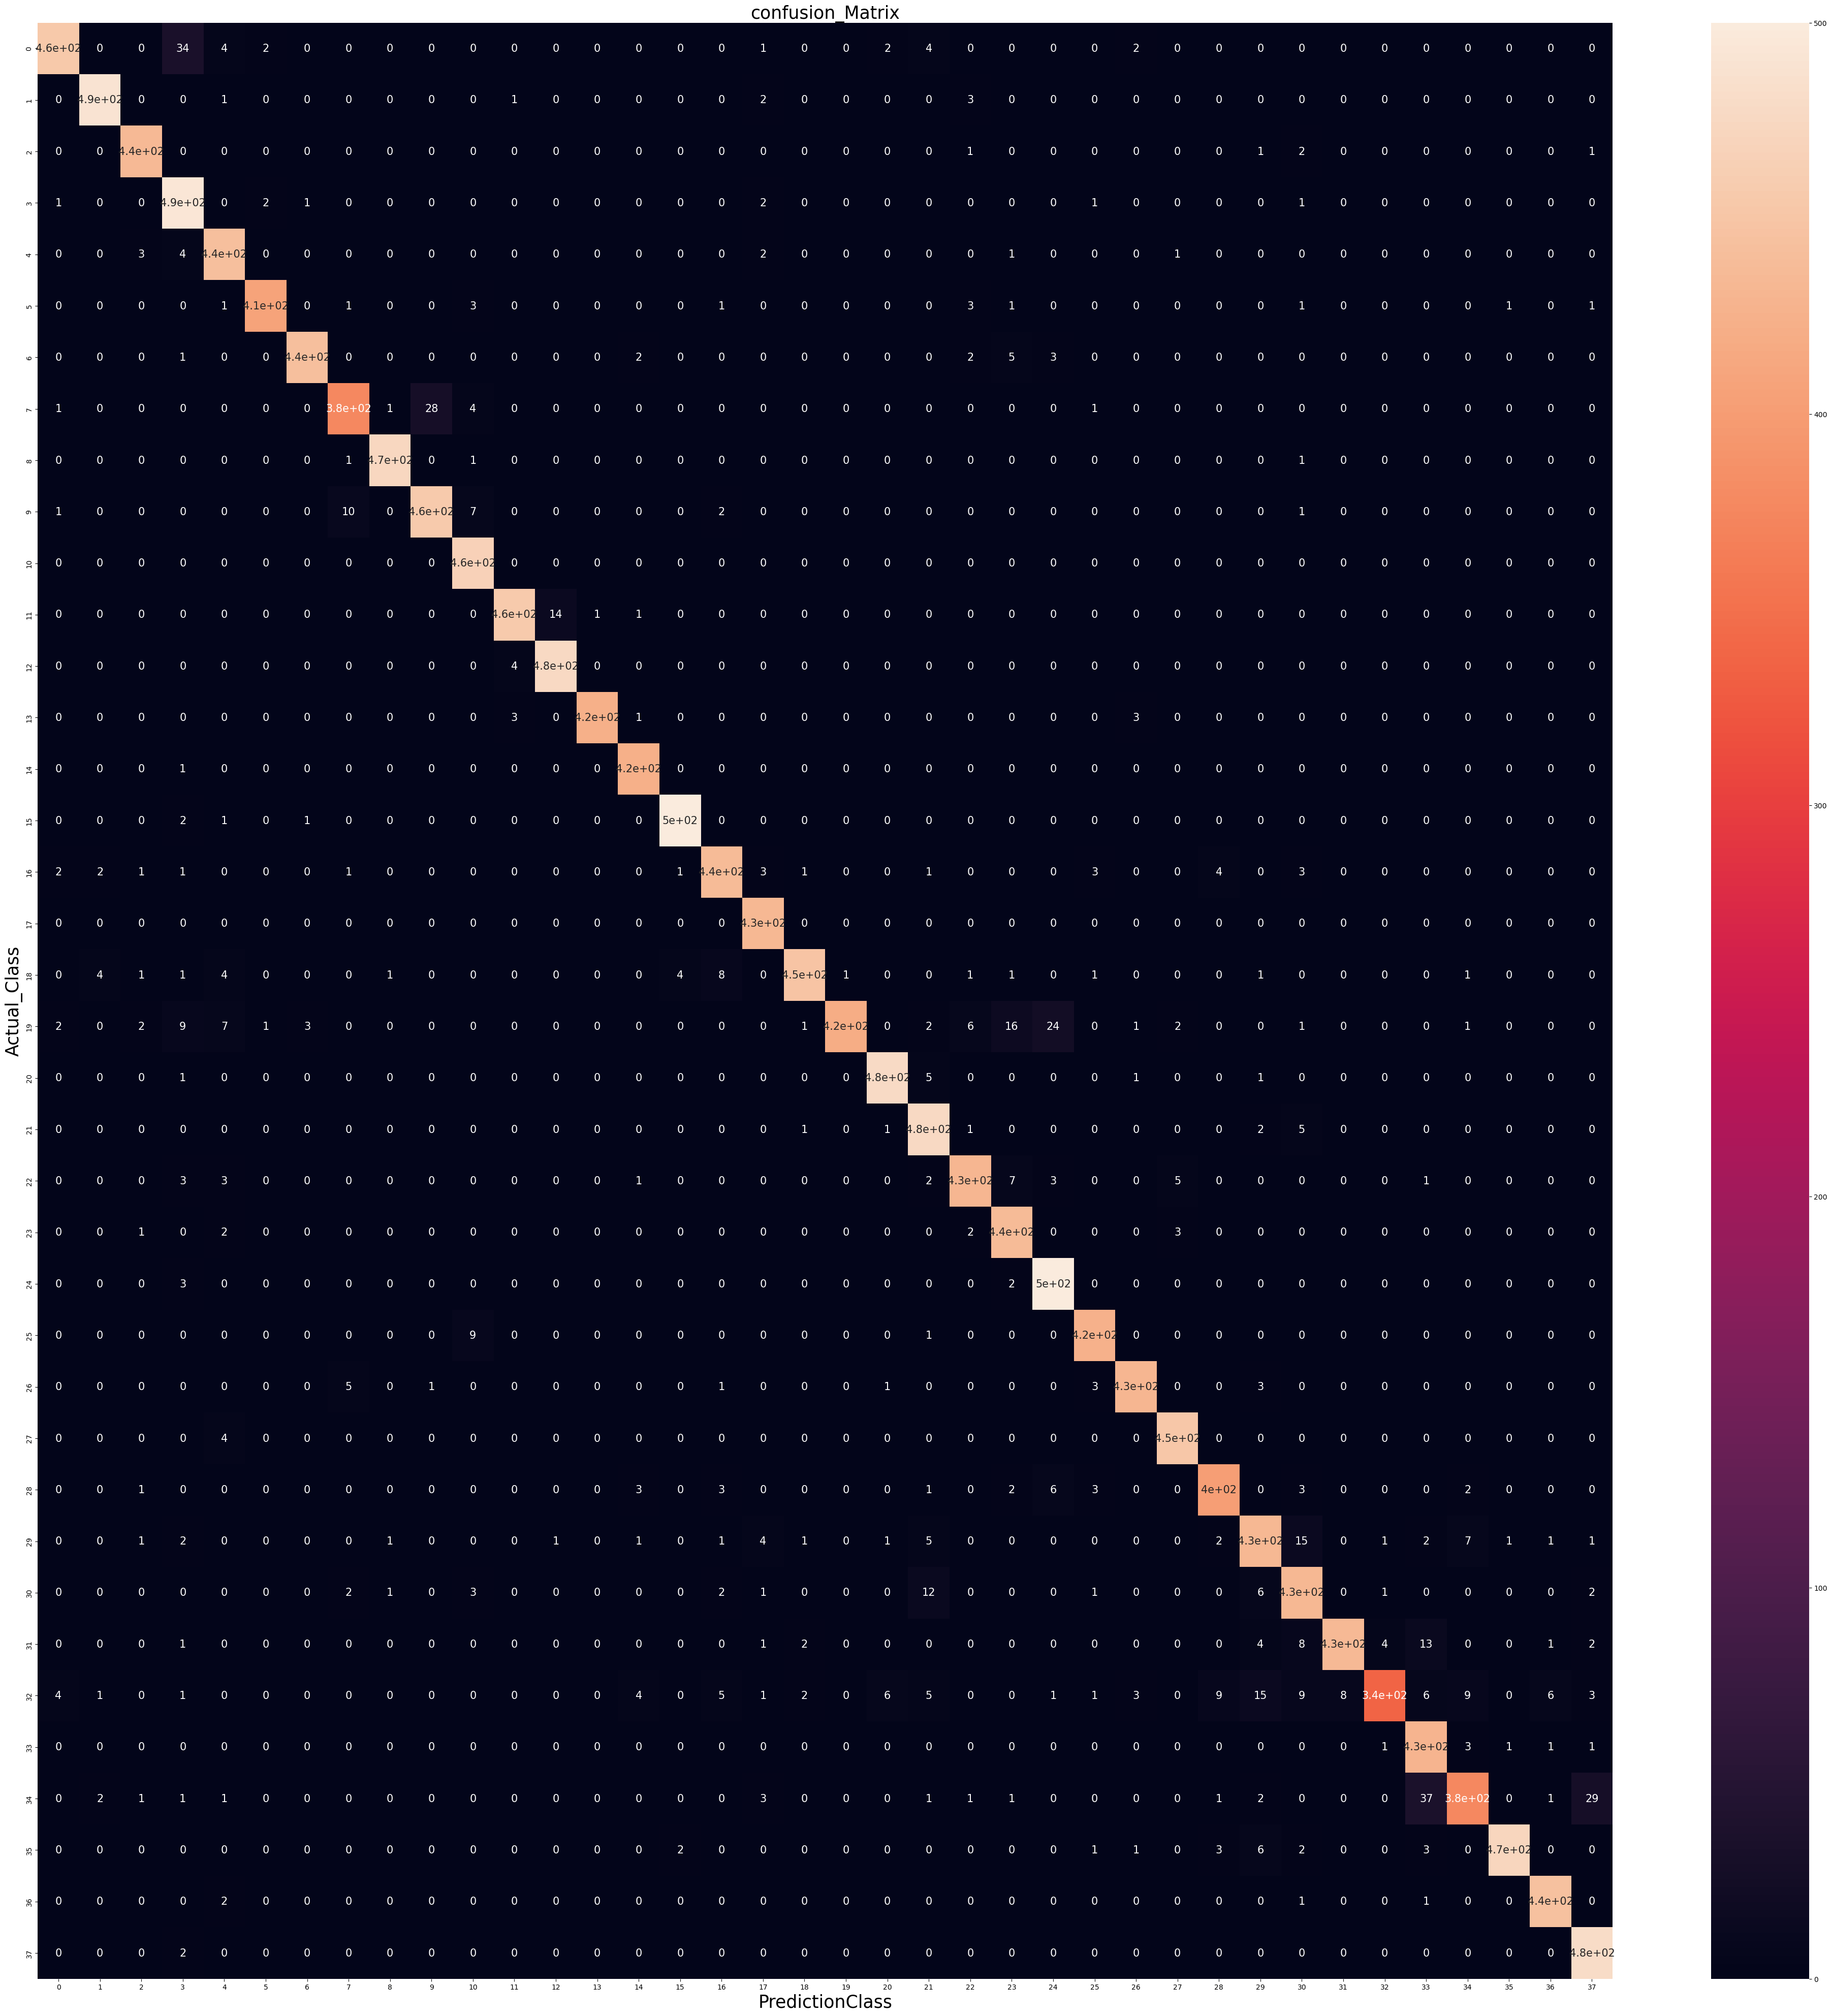

In [194]:
plt.figure(figsize=(50, 50))
sns.heatmap(confusion_matrixs,annot=True,annot_kws={"size": 15})
plt.xlabel('PredictionClass',fontsize = 25)
plt.ylabel('Actual_Class',fontsize = 25)
plt.title('confusion_Matrix',fontsize = 25)
plt.show()